In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# read weight-height dataset
data = "datas_ml/weight-height.csv"
wh_df = pd.read_csv(data)

In [3]:
wh_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
import pandas as pd

# read weight-height dataset
data = "datas_ml/weight-height.csv"
wh_df = pd.read_csv(data)

# 키 변경하기: inch -> cm
wh_df["Height"] = wh_df["Height"] * 2.54

# 몸무게 변경하기: lb -> kg
wh_df["Weight"] = wh_df["Weight"] * 0.4563

# 확인
wh_df.head()


,Gender,Height,Weight
0,Male,187.571423,110.376033
1,Male,174.706036,74.062269
2,Male,188.239668,97.073652
3,Male,182.196685,100.405379
4,Male,177.499761,94.157414


In [5]:
wh_df.shape

(10000, 3)

In [6]:
wh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [7]:
#[문제] 기초 통계량 확인
wh_df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,73.665235
std,9.772721,14.651081
min,137.828359,29.522668
25%,161.304276,61.973777
50%,168.447898,73.561459
75%,175.702625,85.405454
max,200.656806,123.196299


In [8]:
wh_df['Gender'].describe()

count     10000
unique        2
top        Male
freq       5000
Name: Gender, dtype: object

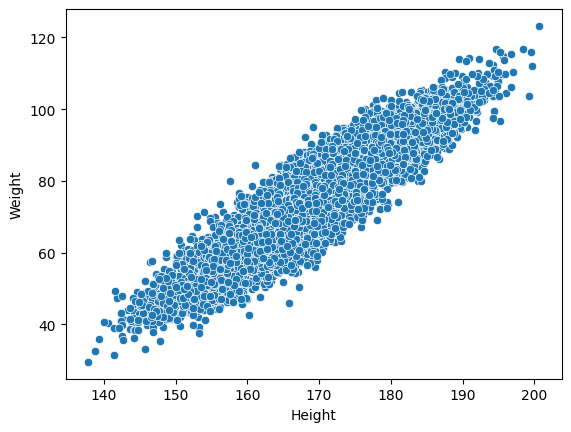

In [ ]:
# 키와 몸무게 분포 확인
sns.scatterplot(data=wh_df, x = 'Height', y = 'Weight')
plt.show()

In [10]:
x = wh_df["Height"] # 입력데이터
y = wh_df["Weight"] # 정답데이터

In [13]:
y[:5]
x[:5]

0    187.571423
1    174.706036
2    188.239668
3    182.196685
4    177.499761
Name: Height, dtype: float64

In [14]:
# 학습, 테스트 데이터셋으로 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [15]:
model_lr = LinearRegression()

In [16]:
# x_train 데이터가 1D 이면 오류 발생함
model_lr.fit(x_train, y_train)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [17]:
# x는 2차원이어야 함.
x_train_2d = x_train.values.reshape(-1,1)

In [18]:
# 모델 학습
# model_lr.fit(x_train, y_train)  <-- x_train은 2D 여야함.
model_lr.fit(x_train_2d, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
#print(type(x_test))
print("테스트 데이터", x_test.values)
print()
print(x_train_2d)

테스트 데이터 [173.53649028 164.22298414 188.04787828 ... 171.59270539 162.35978704
 158.54282215]

[[158.38424815]
 [150.90929264]
 [163.96639183]
 ...
 [172.08583788]
 [167.17562084]
 [174.96463993]]


In [20]:
# 테스트 데이터에 대한 예측을 수행
y_pred = model_lr.predict(x_test.values.reshape(-1,1))

In [21]:
y_pred

array([ 80.48820744,  67.57518835, 100.608002  , ...,  77.79318249,
        64.99189701,  59.69973961], shape=(2000,))

In [22]:
model_lr.coef_

array([1.38648312])

In [23]:
model_lr.intercept_

np.float64(-160.11720767437617)

In [24]:
y_test[:5]

937     94.192251
9355    67.971504
2293    99.389349
192     93.037587
8675    58.119952
Name: Weight, dtype: float64

In [25]:
# MSE(Mean Squared Error)
MSE = mean_squared_error(y_test, y_pred)

# RMSE(Root Mean Squared Error)를 측정하기
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

# 결과는 도메인마다 다름

MSE : 31.729201319729608
RMSE : 5.632867948010996


In [26]:
a = model_lr.coef_
b = model_lr.intercept_
# y_pred = a * x + b
y = a * 180 + b
y

array([89.44975458])

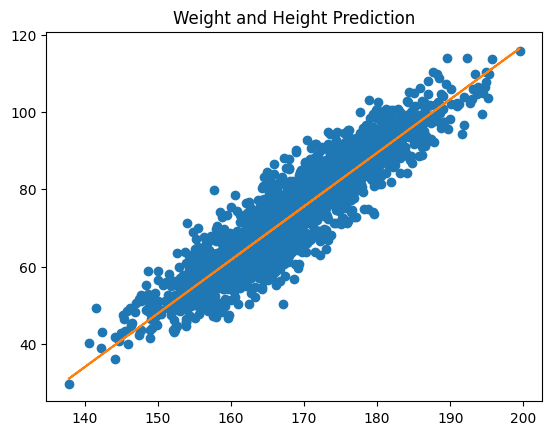

In [27]:
plt.plot(x_test, y_test, 'o')
plt.plot(x_test, y_pred)
plt.title('Weight and Height Prediction')
plt.show()

In [36]:
# read weight-height dataset
data = "datas_ml/weight-height.csv"
gwh_df = pd.read_csv(data)
gwh_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [37]:
# Gender 컬럼을 숫자로 변환
gwh_df['Gender'] = gwh_df['Gender'].map({"Male": 0, "Female": 1})
gwh_df.head()

,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801


In [38]:
# X = Gender, Height
X = gwh_df.drop(columns='Weight')

# y = Weight
y = gwh_df['Weight']

In [54]:
# 인치, 파운드 -> cm, kg으로 변환
gwh_df["Height"] = gwh_df["Height"] * 2.54
gwh_df["Weight"] = gwh_df["Weight"] * 0.4563
# read weight-height dataset
gwh_df.head()

,Gender,Height,Weight
0,0,476.431415,50.364584
1,0,443.753332,33.794613
2,0,478.128756,44.294708
3,0,462.779580,45.814975
4,0,450.849394,42.964028


In [46]:
# 학습용, 테스트용 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [48]:
# 학습모델 객체생성, 학습, 테스트
model_lr2 = LinearRegression()
model_lr2.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
X_train

,Gender,Height
9254,1,61.391644
1561,0,74.697637
1670,0,68.507815
6087,1,65.797516
6669,1,67.161806
...,...,...
5734,1,63.349988
5191,1,58.861625
5390,1,64.325406
860,0,69.074492


In [49]:
y_pred = model_lr2.predict(X_test)
y_pred

array([165.58497097, 185.78096721, 171.25903401, ..., 126.76971077,
       175.2620878 , 105.52795239], shape=(2000,))

In [50]:
X_test.columns

Index(['Gender', 'Height'], dtype='object')

In [51]:
# MSE(Mean Squared Error)를 측정하기
MSE = mean_squared_error(y_test, y_pred)

# RMSE(Root Mean Squared Error)를 측정하기
RMSE = np.sqrt(MSE)

print('MSE :', MSE)
print('RMSE :', RMSE)

# 결과는 도메인마다 다름

MSE : 101.24427647013299
RMSE : 10.062021490244044


In [52]:
X_test[:5]

,Gender,Height
6252,1,68.687232
4684,0,68.829334
1731,0,66.398128
4742,0,71.929340
4521,0,67.042903
